# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")


# Load Data

In [2]:
# Load data
X_main = pd.read_csv('train.csv', index_col='Id')
X_test_main = pd.read_csv('test.csv', index_col='Id')

# Outliers

In [3]:
X_main.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

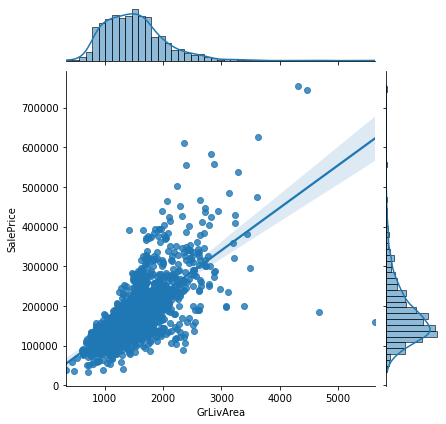

In [4]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=X_main, kind="reg")

In [5]:
X_main = X_main.drop(X_main[(X_main['GrLivArea']>4000) & (X_main['SalePrice']<300000)].index)
X_main.reset_index(drop=True, inplace=True)

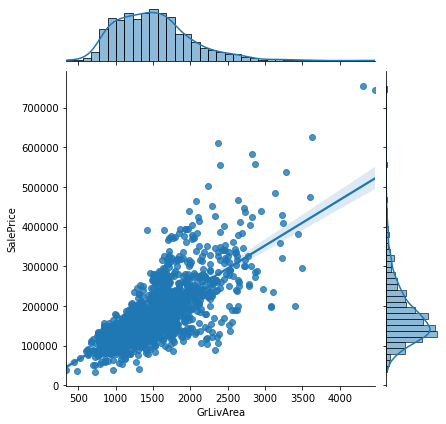

In [6]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=X_main, kind="reg")

# Train test split

In [7]:
# Target
y_log1p = np.log1p(X_main.SalePrice)
y = y_log1p.reset_index(drop=True)
# Features
features = X_main.columns.difference(['SalePrice'])
# X and X_test
X = X_main[features].copy()
X_test = X_test_main[features].copy()
# Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)

# Exploration

In [8]:
X_main.shape

(1458, 80)

In [9]:
y.shape

(1458,)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 1170 to 684
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1166 non-null   int64  
 1   2ndFlrSF       1166 non-null   int64  
 2   3SsnPorch      1166 non-null   int64  
 3   Alley          73 non-null     object 
 4   BedroomAbvGr   1166 non-null   int64  
 5   BldgType       1166 non-null   object 
 6   BsmtCond       1137 non-null   object 
 7   BsmtExposure   1136 non-null   object 
 8   BsmtFinSF1     1166 non-null   int64  
 9   BsmtFinSF2     1166 non-null   int64  
 10  BsmtFinType1   1137 non-null   object 
 11  BsmtFinType2   1136 non-null   object 
 12  BsmtFullBath   1166 non-null   int64  
 13  BsmtHalfBath   1166 non-null   int64  
 14  BsmtQual       1137 non-null   object 
 15  BsmtUnfSF      1166 non-null   int64  
 16  CentralAir     1166 non-null   object 
 17  Condition1     1166 non-null   object 
 18  Condit

In [11]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1170,1261,0,0,NaN,3,1Fam,TA,No,662,0,...,WD,288,Pave,6,1261,AllPub,0,1958,1958,2008
75,526,462,0,NaN,2,Twnhs,TA,Gd,462,0,...,WD,0,Pave,5,462,AllPub,120,1973,1973,2009
390,961,406,0,Grvl,4,1Fam,Gd,No,241,391,...,WD,0,Pave,7,861,AllPub,0,1900,1950,2008
1282,912,912,0,NaN,4,Duplex,TA,Av,0,0,...,WD,0,Pave,8,912,AllPub,128,1971,1971,2010
682,1668,0,0,NaN,3,1Fam,TA,Av,1059,0,...,WD,0,Pave,7,1626,AllPub,257,2002,2002,2007


In [12]:
# Categoricals
X_train.describe(include=['O']).T

,count,unique,top,freq
Alley,73,2,Grvl,41
BldgType,1166,5,1Fam,987
BsmtCond,1137,4,TA,1045
BsmtExposure,1136,4,No,781
BsmtFinType1,1137,6,Unf,356
BsmtFinType2,1136,6,Unf,1005
BsmtQual,1137,4,TA,527
CentralAir,1166,2,Y,1086
Condition1,1166,9,Norm,1010
Condition2,1166,7,Norm,1156


In [13]:
# Numericals
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1166.0,1153.655232,370.796696,334.0,874.25,1079.0,1382.75,3228.0
2ndFlrSF,1166.0,354.815609,433.772515,0.0,0.00,0.0,729.75,2065.0
3SsnPorch,1166.0,2.722985,26.313259,0.0,0.00,0.0,0.00,508.0
BedroomAbvGr,1166.0,2.888508,0.782593,0.0,2.00,3.0,3.00,6.0
BsmtFinSF1,1166.0,430.548885,431.551538,0.0,0.00,370.5,701.50,2188.0
BsmtFinSF2,1166.0,46.079760,160.558557,0.0,0.00,0.0,0.00,1474.0
BsmtFullBath,1166.0,0.409091,0.512390,0.0,0.00,0.0,1.00,3.0
BsmtHalfBath,1166.0,0.057461,0.240082,0.0,0.00,0.0,0.00,2.0
BsmtUnfSF,1166.0,570.856775,433.731373,0.0,245.00,486.0,808.00,2046.0
EnclosedPorch,1166.0,22.979417,63.311096,0.0,0.00,0.0,0.00,552.0


In [14]:
y_train.head()

1170    12.001512
75      11.418626
390     11.686887
1282    11.842236
682     12.560248
Name: SalePrice, dtype: float64

## Drop columns

In [15]:
# Missing data and usualy not relevant 
X_train.drop(columns=['PoolQC', 'FireplaceQu', 'Fence','Alley', 'MiscFeature','3SsnPorch'], axis=1, inplace=True)
X_valid.drop(columns=['PoolQC', 'FireplaceQu', 'Fence','Alley', 'MiscFeature','3SsnPorch'], axis=1, inplace=True)
X_test.drop(columns=['PoolQC', 'FireplaceQu', 'Fence','Alley', 'MiscFeature','3SsnPorch'], axis=1, inplace=True)

C:\Users\utilisateur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


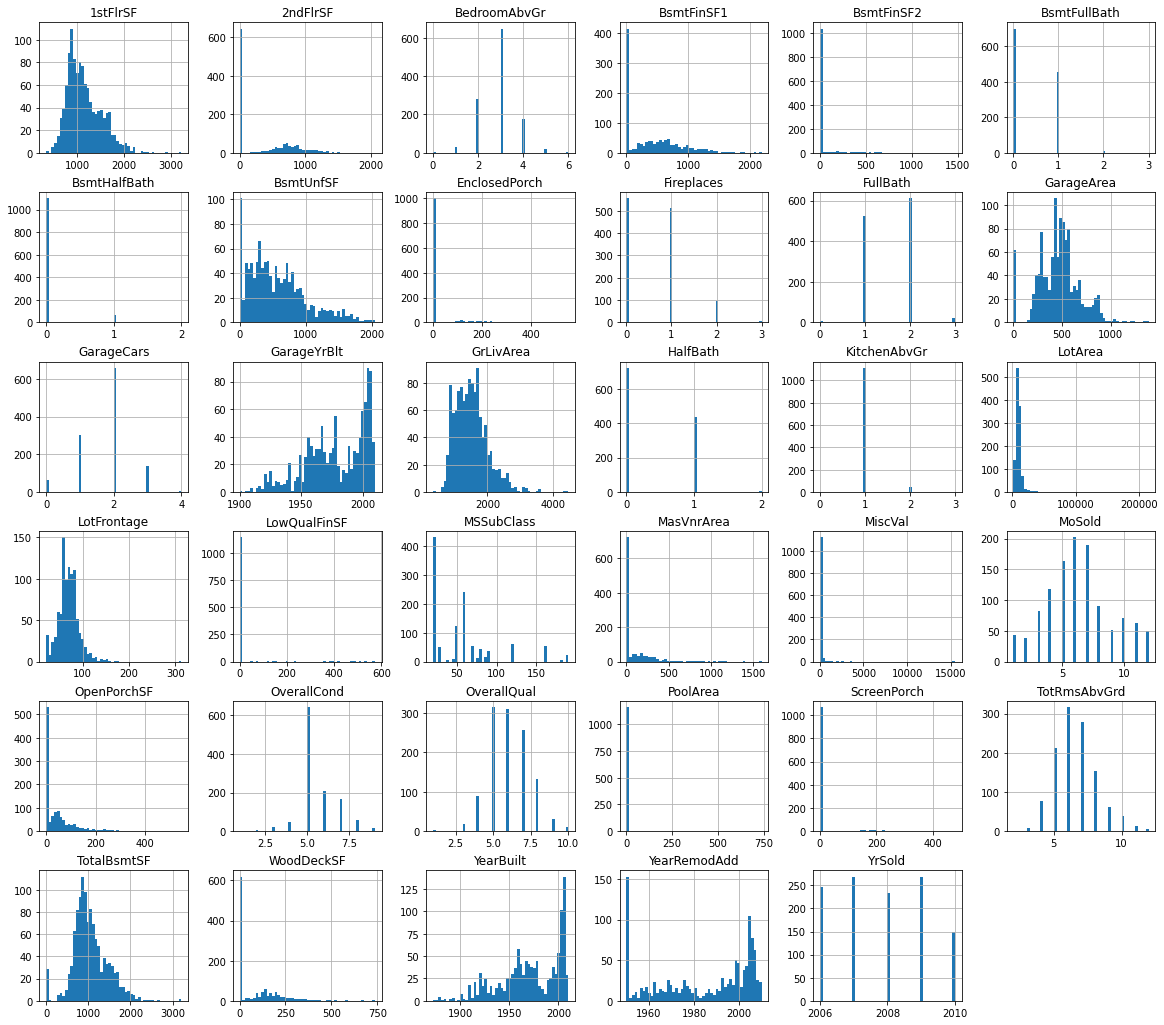

In [16]:
X_train.hist(bins=50, figsize=(20,18))
plt.show()

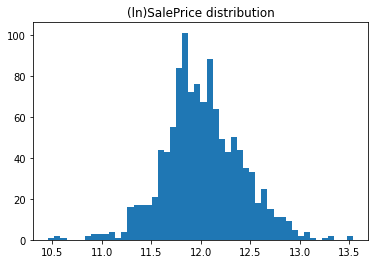

In [47]:
# Target distribution (and log distribution)
# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.hist(y_train, bins=50)
# ax2.hist(np.log(y_train), bins=50)

plt.hist(y_train, bins=50)
plt.title('(ln)SalePrice distribution')
plt.show()

## Correlations

In [18]:
corr_matrix = X_main.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)
# plt.figure(figsize=(16,6))
# plt.xticks(rotation=45)
# plt.plot(corr)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

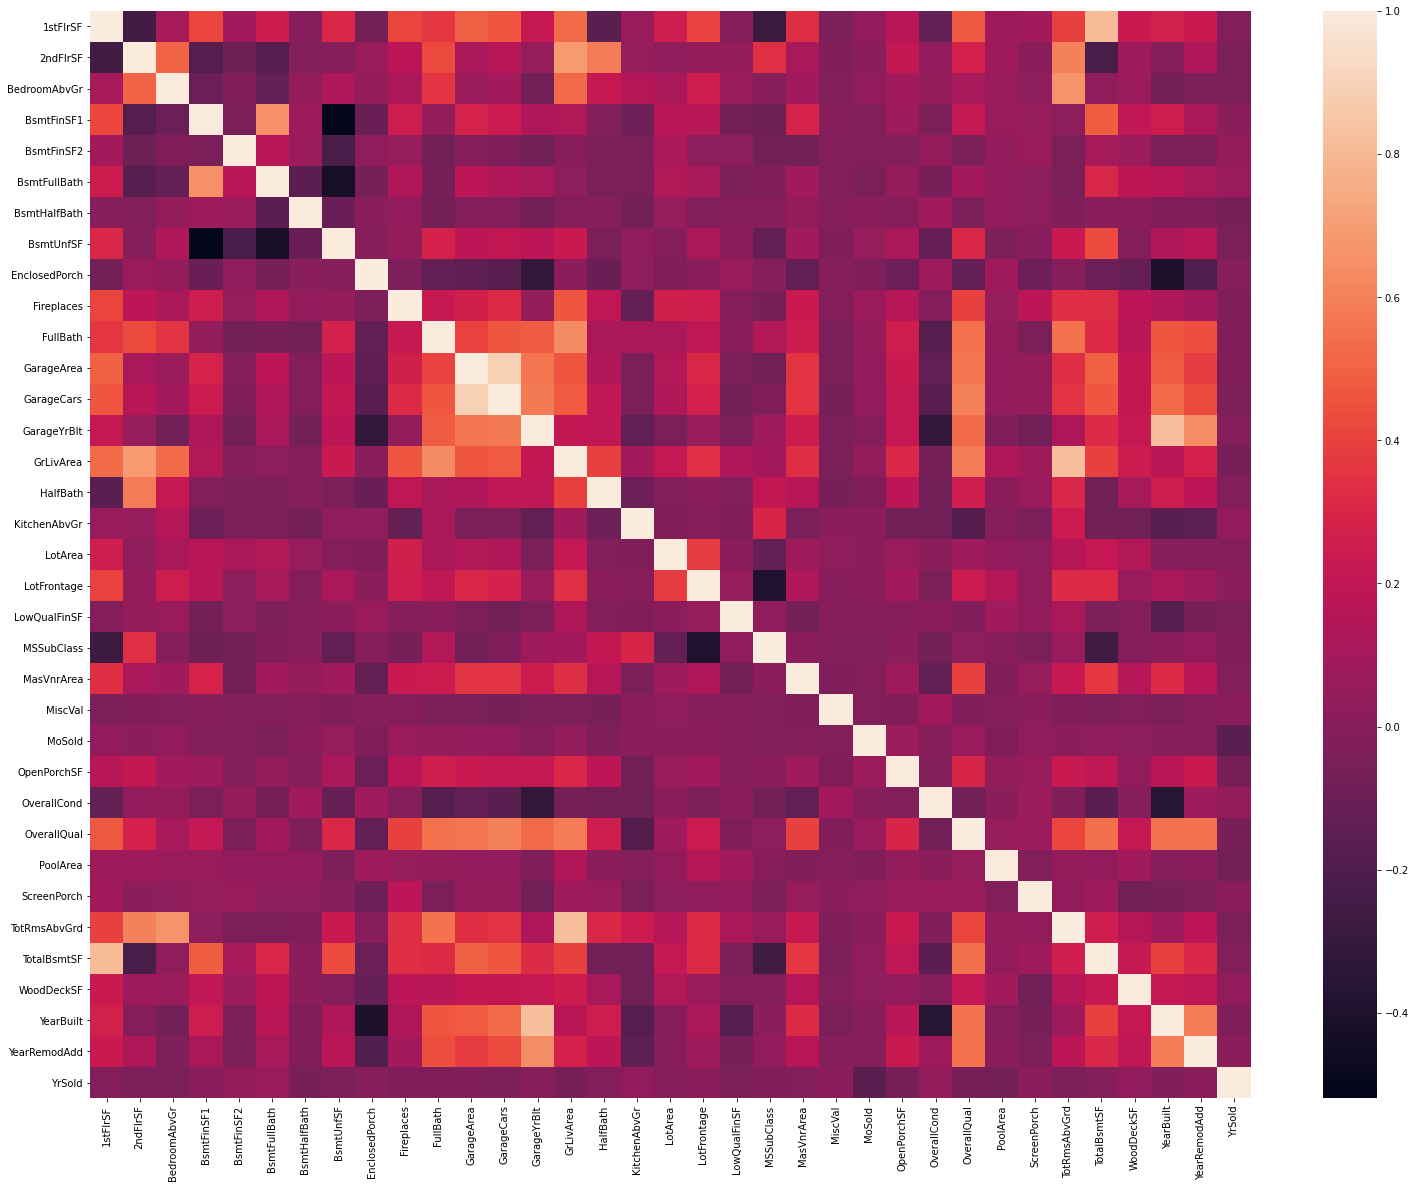

In [19]:
plt.figure(figsize=(26,20))
heatmap = sns.heatmap(X_train.corr(), annot = False)

In [20]:
# Correlations
X_train.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd', 'BsmtFullBath', '1stFlrSF', 'GarageCars'], axis=1, inplace=True)
X_valid.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd', 'BsmtFullBath', '1stFlrSF', 'GarageCars'], axis=1, inplace=True)
X_test.drop(columns=['GarageYrBlt', 'TotRmsAbvGrd', 'BsmtFullBath', '1stFlrSF', 'GarageCars'], axis=1, inplace=True)

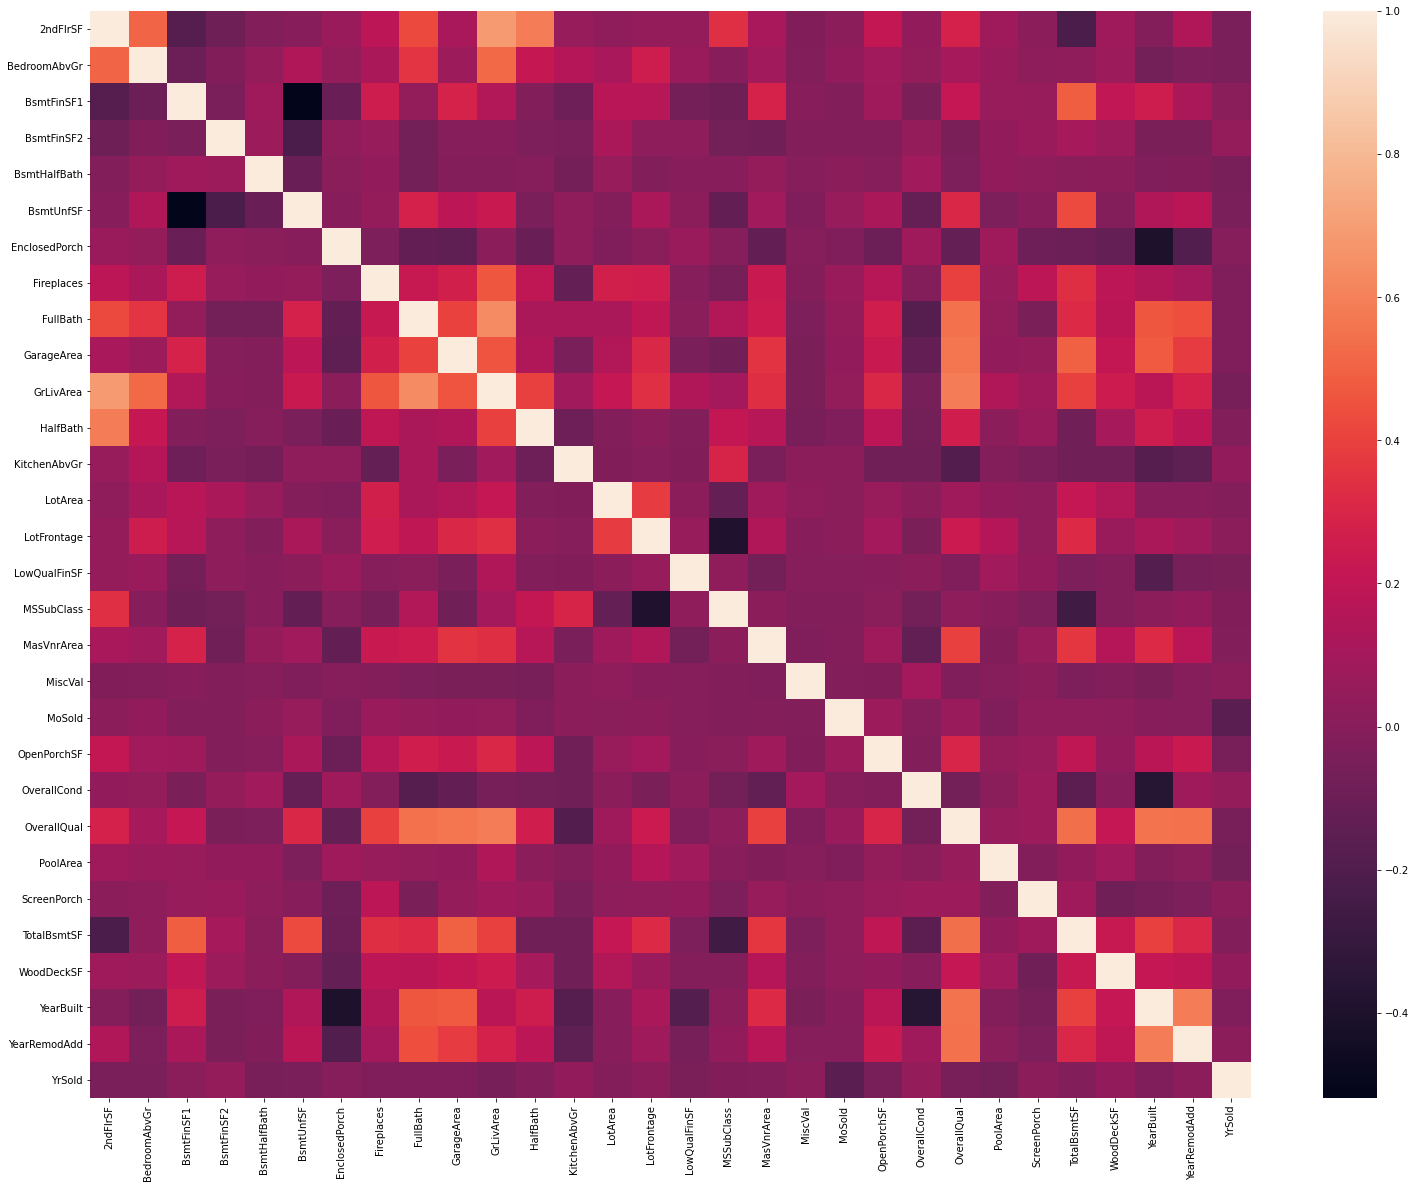

In [21]:
plt.figure(figsize=(26,20))
heatmap = sns.heatmap(X_train.corr(), annot = False)

# Preprocessing

## Numerical & Categorical

In [22]:
numerical_columns = [colname for colname in X_train.columns if X_train[colname].dtype in ['int64', 'float64']]

categorical_columns = [colname for colname in X_train.columns if X_train[colname].dtype == "object"]

print("X_train columns number :", len(X_train.columns), "; numerical_columns number : ",len(numerical_columns), "+ categorical_columns number : ",len(categorical_columns))

X_train columns number : 68 ; numerical_columns number :  30 + categorical_columns number :  38


## Null

In [23]:
# if missing values in target, drop rows : here no missing values.

# missing values in rows
X_train.isnull().sum()[X_train.isnull().sum() > 0]

BsmtCond         29
BsmtExposure     30
BsmtFinType1     29
BsmtFinType2     30
BsmtQual         29
Electrical        1
GarageCond       62
GarageFinish     62
GarageQual       62
GarageType       62
LotFrontage     203
MasVnrArea        7
MasVnrType        7
dtype: int64

In [24]:
# missing values numerical_columns & categorical_columns and Imputation

X_train[categorical_columns].isnull().sum()[X_train[categorical_columns].isnull().sum() > 0]

BsmtCond        29
BsmtExposure    30
BsmtFinType1    29
BsmtFinType2    30
BsmtQual        29
Electrical       1
GarageCond      62
GarageFinish    62
GarageQual      62
GarageType      62
MasVnrType       7
dtype: int64

In [25]:
X_train[numerical_columns].isnull().sum()[X_train[numerical_columns].isnull().sum() > 0]

LotFrontage    203
MasVnrArea       7
dtype: int64

In [26]:
# Imputations types
numerical_columns_constant = ['MasVnrArea']
numerical_columns_mean = ['LotFrontage']
categorical_columns_constant =['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual','GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType']
categorical_columns_mostfrequent = ['Electrical']

allcolumns = numerical_columns_constant+numerical_columns_mean+categorical_columns_constant+categorical_columns_mostfrequent

## Transformers & Preprocessor

In [27]:
# Transformers
numerical_transformer_constant = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler',StandardScaler())
])
numerical_transformer_mean = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categorical_transformer_constant = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])
categorical_transformer_mostfrequent = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [28]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_transformer_constant', numerical_transformer_constant, numerical_columns_constant),
        ('numerical_transformer_mean', numerical_transformer_mean, numerical_columns_mean),
        ('categorical_transformer_constant', categorical_transformer_constant, categorical_columns_constant),
        ('categorical_transformer_mostfrequent', categorical_transformer_mostfrequent, categorical_columns_mostfrequent),
    ]
)

# Test models

In [29]:
# Linera Models
# LinearRegression
pipe_Linear = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('Linear', LinearRegression())
    ])    
# Ridge
pipe_Ridge = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('Ridge', Ridge(random_state=5))
    ])  
# Huber
pipe_Huber = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('Huber', HuberRegressor(max_iter=1000))
    ])  
# Lasso
pipe_Lasso = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('Lasso', Lasso(random_state=5, max_iter=50000))
    ])
# ElasticNet
pipe_ElaNet = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('ElaNet', ElasticNet(random_state=5))
    ])
# BayesianRidge
pipe_BayesRidge = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('BayesRidge', BayesianRidge(n_iter=2000, compute_score=True))
    ])
# Ensemble models
# GradientBoostingRegressor
pipe_GBR  = Pipeline(steps = [
    ('preprocessor', preprocessor),
    # ('pca', decomposition.PCA(n_components=2)),
    ('GBR', GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.01, loss='ls',  n_estimators=500, tol= 0.01, random_state=5 ))
    ])

# AdaBoostRegressor
pipe_ADA = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('ADA', AdaBoostRegressor(DecisionTreeRegressor(), random_state=5, loss='exponential'))
    ])
pipe_Forest = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('Forest', RandomForestRegressor())
    ])

# Cross Validation

In [30]:
# Loops over linear and ensemble models
list_pipelines1 = [pipe_Linear, pipe_Ridge, pipe_Huber, pipe_BayesRidge, pipe_ElaNet, pipe_Lasso]

In [31]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for pipe in list_pipelines1 :    
    scores = cross_val_score(pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 95085112775.152878 	 133285476132.066788 	 0.244354
Ridge 	 0.237011 	 0.006409 	 0.224863
Huber 	 0.238762 	 0.008922 	 0.221577
BayesRidge 	 0.236097 	 0.008141 	 0.220970
ElaNet 	 0.396481 	 0.015430 	 0.382388
Lasso 	 0.396481 	 0.015430 	 0.382388


In [32]:
list_pipelines2 = [pipe_GBR, pipe_ADA, pipe_Forest]

In [33]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)

for pipe in list_pipelines2 :
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=FutureWarning)
        scores = cross_val_score(pipe, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
        scores = np.sqrt(-scores)
        print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.240110 	 0.007587 	 0.229541
ADA 	 0.267248 	 0.011702 	 0.251358
Forest 	 0.258303 	 0.010978 	 0.245065


# GridsearchCV
(google colab)

In [34]:
# GradientBoostingRegressor().get_params()

In [35]:
# param_grid = [{'GBR__learning_rate':[0.1, 0.05, 0.01], 'GBR__loss':['ls', 'lad', 'huber','quantile'],'GBR__tol': [0.01, 0.001, 0.0001], 'GBR__n_estimators':[100,500,1000,1500], 'GBR__criterion':['friedman_mse', 'mse', 'mae']}]

In [36]:
# grid_search = GridSearchCV(pipe_GBR,param_grid,cv=5, scoring="neg_mean_squared_error")
# grid_search.fit(X_train,y_train)
# print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
# grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
# print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

# Evaluate

In [50]:
model = pipe_GBR.fit(X_train,y_train)

In [51]:
preds = model.predict(X_valid)

In [52]:
score = mean_squared_log_error(y_valid,preds)
print('RMSLE:', round(score,6))

RMSLE: 0.000348


# Submit

In [40]:
# model = pipe_GBR.fit(X,y)

In [53]:
preds_test = np.expm1(model.predict(X_test))

In [54]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice':preds_test})
output.to_csv('submission.csv', index=False)